Apply **DBSCAN Clustering** for the **Country Status DataSet**. It contains the following data fields: country, child_mort, exports, health,	imports, income,	inflation,	life_expec,	total_fer,	gdpp

Define the Required Libraries for this problem. **(2 marks)**

In [1]:
# Data analysis libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn import metrics
# Disable warnings
import warnings
warnings.simplefilter('ignore')

# Inference:
Importing the required python libaries for  project:
- numpy, pandas,matplotlib,seaborn is used for the data manipulation and data visulaisation .
- The sklearn LabelEncoder,standardscalar Libaries is used for encoding and data preprocessing purpose.
- NearestNeighbors,DBSCAN,metrics is a set of libaries used for building the Density based clustering model and To evaluate the performance  of the model.

Open the CSV file and display the statistical information about the dataset **(1 mark)**

In [2]:
df=pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
df.shape

(167, 10)

In [5]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Inference:
- pd.read_csv is function from pandas used to read the given country-data.csv dataset.
- df.head() - It displays the first 4 rows of the dataset.
- df.info() - displays the information about the dataset like datatype, column names,memory etc
- df.shape - returns the number of rows and columns present in the dataset. Here we have 167 rows and 10 columns
- df.describe() - provides the statstical information about the dataset. some of the inferencce we can get from this are : the maximum exports is 200 and the inimumm income 609. and the average life expectation is 70.5
- df.isnull().sum() - there is no null values present in the dataset.


Print the correlation map and find the most related features. **(1 mark)**

In [7]:
# Calculate correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


# Inference:
corr() is used to calculate the correlation value between the columns in the dataset. The most related features are: gdpp and income,child_mort and total_fer

Plot a graph with the correlated features. **(1 mark)**

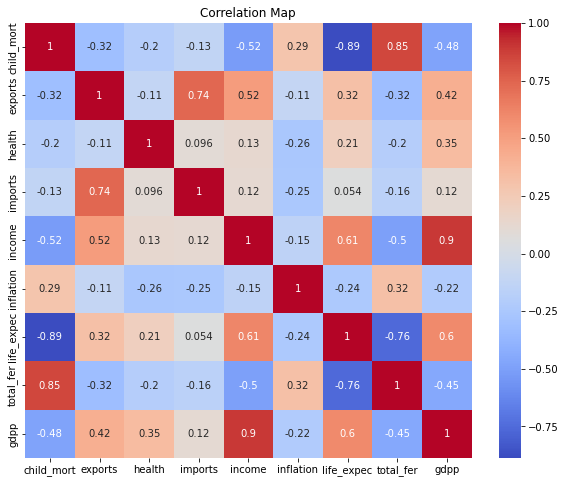

In [8]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

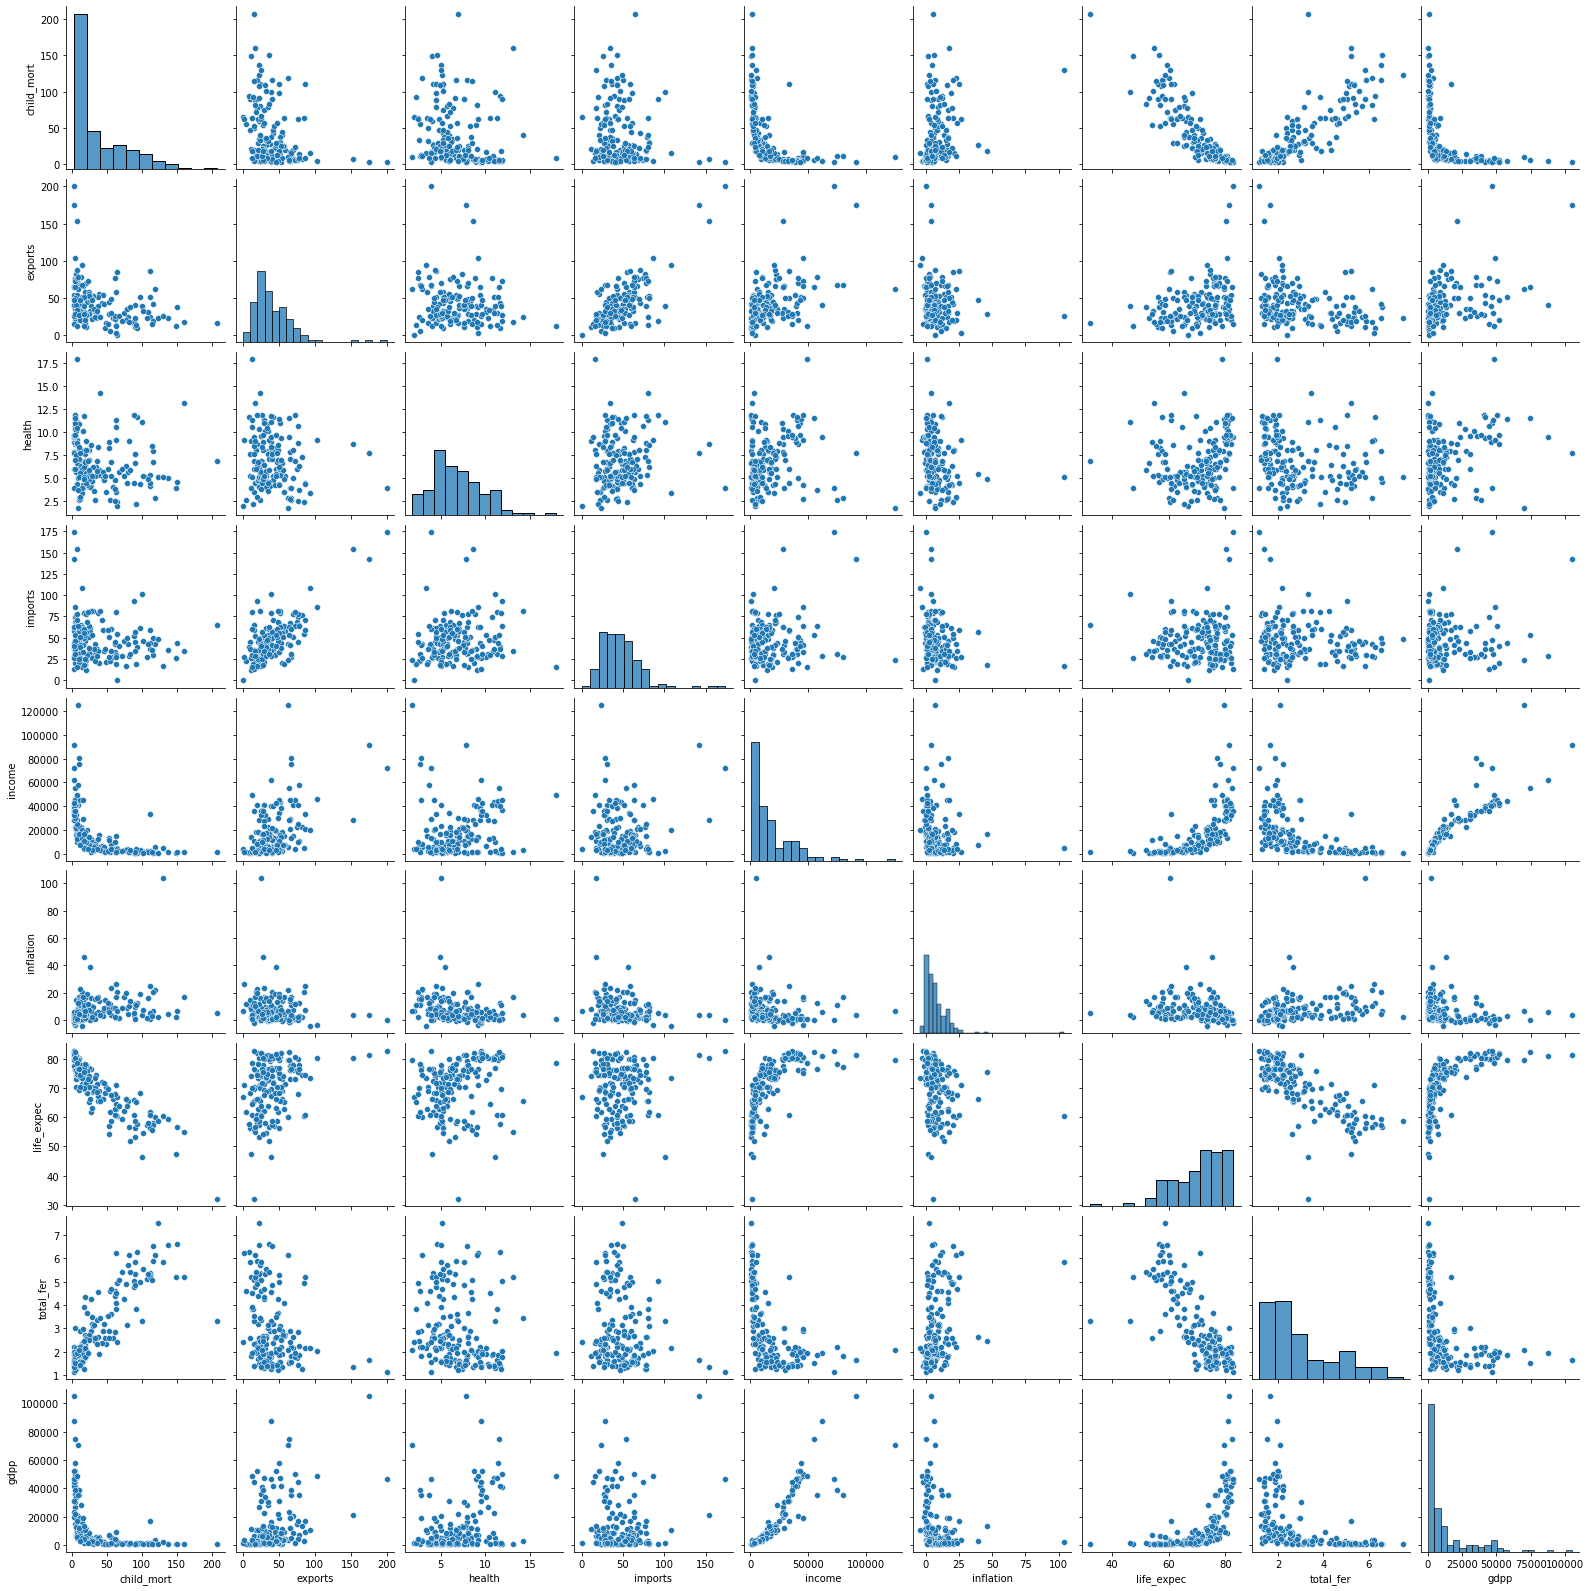

In [9]:
sns.pairplot(df)

# Inference
- <b> Correlation matrix</b>:<br>
i) we creates a heatmap to explore the correlations among the numerical variables in the dataset.<br>
ii) Each cell in the heatmap represents the correlation coefficient between two variables. Correlation coefficients range from -1 to 1, where -1 indicates a strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no correlation.<br>
iii)The heatmap uses a color scale to represent the magnitude of the correlation coefficients. The cooler colors (e.g., blue) represent negative correlations, and the warmer colors (e.g., red) represent positive correlations.<br>
iv) The column  "child_mort" and "inflation" , "exports" and "life_expec"has negative correlation and 'health','income' ,'imports' columns have positive correlation.<br>

- <b>Pair Plot</b> - Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. 
The diaganol of pairplot contains the histogram that shows the distribution of data. It is used to decide which two columns can be used for the final visualisation of clusters


Apply Elbow Method to find optimal clusters. **(1 marks)**

In [10]:
features = ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
data = df[features]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

''''Rather than experimenting with different values of epsilon, we can use the elbow point detection method to arrive at a suitable value of epsilon.

In this approach, the average distance between each point and its k nearest neighbors is calculated where k = the MinPts selected by us. 
We then plot the average k-distances in ascending order on a k-distance graph
The optimal value for epsilon is the point with maximum curvature or bend, i.e. at the greatest slope.'''

from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
 
neighbors = NearestNeighbors(n_neighbors=18)
neighbors_fit = neighbors.fit(scaled_data)
distances, indices = neighbors_fit.kneighbors(scaled_data)

In [11]:
distances[:,1]

array([0.90708205, 0.55954063, 1.11855708, 1.67432496, 0.66490184,
       1.16832977, 0.61339705, 0.81868277, 0.67478477, 1.17143329,
       0.87916656, 1.17036681, 0.7050295 , 0.59915403, 1.09343951,
       0.77719316, 0.68623663, 0.79141128, 0.91509555, 0.82059106,
       0.60456236, 1.03595667, 0.86227289, 0.68841514, 0.42313147,
       0.94279999, 1.1483594 , 0.72278522, 0.79141128, 0.59031996,
       0.70822098, 1.61189988, 0.81676075, 0.7290667 , 0.75368652,
       0.74851901, 0.91825875, 1.50872194, 1.87250938, 0.93973004,
       0.8366136 , 0.27051092, 0.79445244, 0.63991284, 0.75277946,
       0.74899076, 0.80463976, 0.95477211, 0.55954063, 2.16257048,
       1.20166926, 0.64951993, 0.72278522, 0.56879938, 0.59031996,
       1.7659545 , 0.62753127, 0.67184012, 0.67478477, 1.02488594,
       0.48706989, 0.65245665, 0.74899076, 0.94298585, 0.99463531,
       0.7370635 , 3.23958591, 0.66728948, 0.80639479, 0.7050295 ,
       1.04365172, 0.81520539, 1.55026196, 1.36201479, 1.13876

In [12]:
indices

array([[  0,  94, 155, ...,  97,  36,  59],
       [  1,  48,  92, ...,  41,   4,  46],
       [  2,  79,  19, ...,  89, 125, 118],
       ...,
       [164,  83,  96, ..., 100,  16, 148],
       [165, 142,  59, ...,  84,   2,  79],
       [166,  94, 106, ..., 129, 142, 150]], dtype=int64)

Plot Elbow curve **(1 mark)**

Text(0, 0.5, 'Distance')

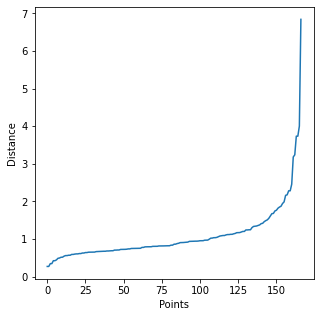

In [13]:
distances = np.sort(distances[:,1], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [14]:
#To determine the location of maximum curvature visually can be difficult. Hence, a Python package called kneed can be used to detect the knee or elbow point. This can be installed with ‘pip install kneed’
# Using the package below, we can now see that the elbow point lies at the value of 0.163 and this is the optimum value of epsilon that we will use now.
!pip install kneed

1.6118998789613155


<Figure size 360x360 with 0 Axes>

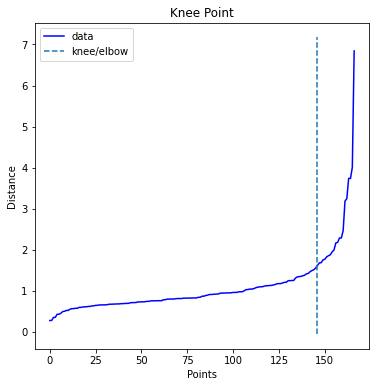

In [15]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

# Inference:
- we implemented the standard scaling to make all the values within the same range before building the model
-<b>Nearest neighbors : </b>Rather than experimenting with different values of epsilon, we can use the elbow point detection method to arrive at a suitable value of epsilon.In this approach, the average distance between each point and its k nearest neighbors is calculated where k = the MinPts selected by us. We then plot the average k-distances in ascending order on a k-distance graph.The optimal value for epsilon is the point with maximum curvature or bend, i.e. at the greatest slope.  The K value in nearest neighbors is equal to minpts which is minpts = 2*no.of dimension, so here we used k=18 (2 * 9 features)
- <b> Elbow point</b>:To determine the location of maximum curvature visually can be difficult. Hence, a Python package called kneed can be used to detect the knee or elbow point. This can be installed with ‘pip install kneed’.Using the package below, we can now see that the elbow point lies at the value of <br>1.611</br> and this is the optimum value of epsilon that we will use now.


Apply DBSCAN to find optimal eps and minpts. **(2 marks)**

In [16]:
dbscan_cluster = DBSCAN(eps=1.61, min_samples=18)
dbscan_cluster.fit(scaled_data)


DBSCAN(eps=1.61, min_samples=18)

In [17]:
dbscan_cluster.labels_

array([ 1,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,
        1,  0,  0,  0, -1,  0, -1,  0,  1, -1,  0,  1,  0,  0, -1,  1,  0,
        0,  0,  1, -1, -1,  0,  1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  1,
        0,  0,  0,  0, -1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0, -1,  0,
       -1,  0,  0,  0, -1, -1,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,
        0,  0, -1, -1,  0,  0, -1,  0,  1,  1,  0,  0,  1, -1, -1,  0, -1,
       -1, -1,  0,  0,  1, -1,  0,  0, -1,  0,  1, -1, -1, -1, -1,  0,  0,
        0,  0,  0,  0, -1,  0,  0, -1,  0, -1,  1,  0, -1, -1, -1,  0,  0,
       -1, -1,  0,  0,  0,  0,  1,  0, -1, -1,  0,  1,  0, -1,  1,  0,  0,
        0, -1,  1,  0, -1,  0, -1,  0,  0,  0, -1,  0, -1,  1],
      dtype=int64)

Plot the DBSCAN clustered datapoints using scatter plot. **(1 mark)**

In [18]:
df['class_label']= dbscan_cluster.labels_

In [19]:
df['class_label'].value_counts()

 0    94
-1    50
 1    23
Name: class_label, dtype: int64

<AxesSubplot:xlabel='health', ylabel='total_fer'>

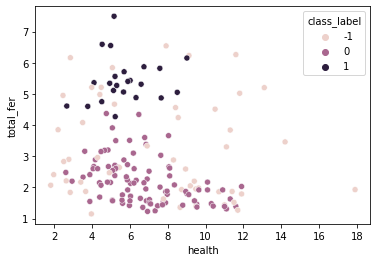

In [20]:
sns.scatterplot(x=df['health'],y=df['total_fer'],hue=df['class_label'])

# Inference:
- <b>DBSCAN</b>:DBSCAN is a density based clustering algorith m that groups together data points based on their density. It requires two parameters: epsilon (ε), which defines the radius of the neighborhood around a data point, and minPoints (MinPts), which specifies the minimum number of data points within ε to form a dense region.
- To implement DBSCAN, you start by randomly selecting an unvisited data point. If the number ofpoints within ε exceeds the minPoints threshold, a new cluster is formed. The algorithm expands the cluster by finding al l directly reachable points within ε and recursively repeating the process until no more points can be added. Any unvisited data points that do not belong to any cluster are marked as noise.
- Here, we built the DBSCAN clustering model with eps =1.61  and minipts =18 (2* no.of dimension) . The model formed three clusters for the country dataset.
The class label  0 has 94 points , classlabel 1 has 23 points and class label -1 has 50 points.
- The label "-1" represent the noise points.. since the dataset has outliers we could see more points belongs to noise clusters. 
- DBSCAN helps to identify the outliers in the dataset.
- Scatter plot is used to visualise the 3 cluster by plotting the points between "health" and  "total_fer" columns.

Apply **Fuzzy C Means Clustering** for the Country Status DataSet. It contains the following data fields: country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp

Define the Required Libraries for this problem. **(2 marks)**

In [21]:
pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.preprocessing import LabelEncoder
from fcmeans import FCM
import skfuzzy as fuzz

Open the CSV file and display the statistical information about the dataset **(1 mark)**

In [23]:
dff=pd.read_csv("Country-data.csv")
dff

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [24]:
dff.shape

(167, 10)

In [25]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [26]:
dff.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


child_mort


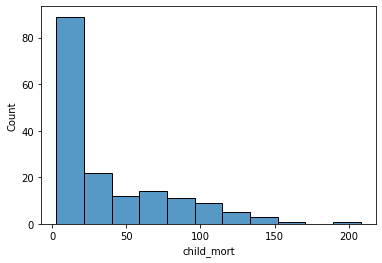

exports


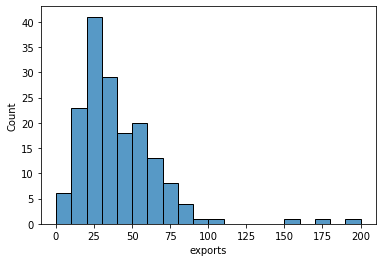

health


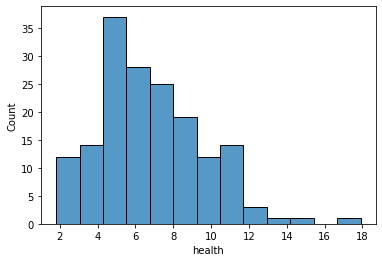

imports


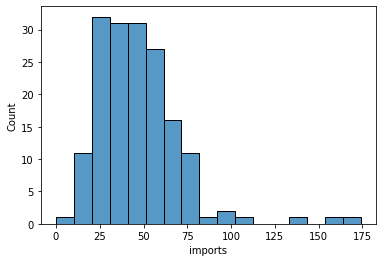

income


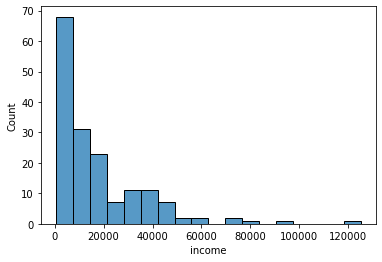

inflation


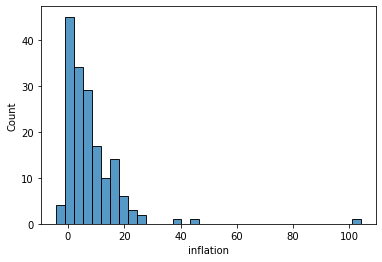

life_expec


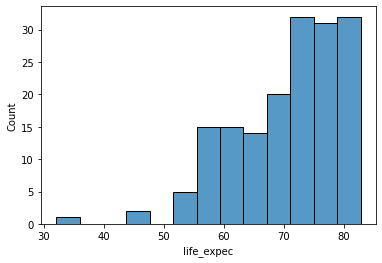

total_fer


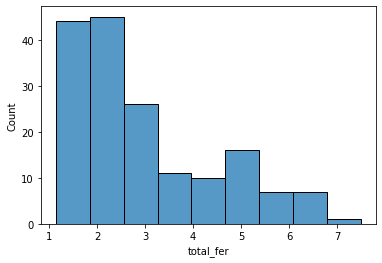

gdpp


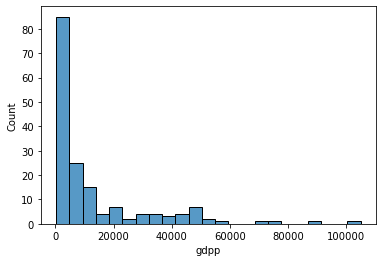

In [27]:
d2=dff.select_dtypes(exclude="object")
for i in d2.columns:
    print(i)
    sns.histplot(x=d2[i]) #here x is assgined to plot the graph horizontally
    plt.show() #plotting each plot and displaying individually

Label encode the country field from the dataset. **(1 mark)**

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dff['country_enc']= le.fit_transform(dff['country'])

In [29]:
dff.drop('country',axis=1,inplace=True)

In [30]:
dff

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_enc
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,162
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,163
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,164
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,165


Print the correlation map and find the most related features. **(1 mark)**

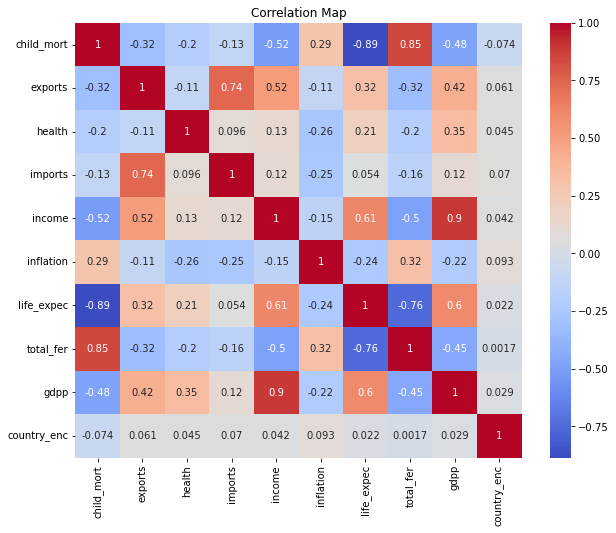

In [31]:
# Plot correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = dff.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Map')
plt.show()

Scaling the dataset. **(1 mark)**

In [32]:
scalarModel = StandardScaler()
data = scalarModel.fit_transform(dff)
data

array([[ 1.29153238, -1.13827979,  0.27908825, ...,  1.90288227,
        -0.67917961, -1.72171011],
       [-0.5389489 , -0.47965843, -0.09701618, ..., -0.85997281,
        -0.48562324, -1.70096662],
       [-0.27283273, -0.09912164, -0.96607302, ..., -0.0384044 ,
        -0.46537561, -1.68022312],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ..., -0.66120626,
        -0.63775406,  1.68022312],
       [ 0.44841668, -0.40647827, -0.59727159, ...,  1.14094382,
        -0.63775406,  1.70096662],
       [ 1.11495062, -0.15034774, -0.33801514, ...,  1.6246091 ,
        -0.62954556,  1.72171011]])

Apply Fuzzy C-Means Algorithm. **(2 marks)**

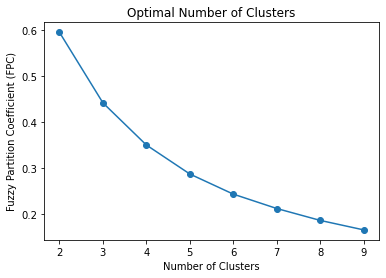

In [33]:
# Define a range of cluster numbers to evaluate
cluster_range = range(2, 10)
fpc_scores = []

# Iterate over the cluster range
for num_clusters in cluster_range:
    # Apply Fuzzy C-Means clustering
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T, num_clusters, 2.0,error=0.005, maxiter=1000, init=None)
    
    # Calculate the Fuzzy Partition Coefficient (FPC)
    fpc_scores.append(fpc)

# Plot the FPC scores
plt.plot(cluster_range, fpc_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Fuzzy Partition Coefficient (FPC)')
plt.title('Optimal Number of Clusters')
plt.show()

In [34]:
fpc_scores

[0.5951887294808221,
 0.4415449163182274,
 0.3497190069099764,
 0.28657865786711156,
 0.24277089676297095,
 0.21146032156794373,
 0.18556075206136555,
 0.16491217651556725]

In [35]:
from fcmeans import FCM
fcmModel = FCM(n_clusters = 3)
fcmModel.fit(data)
center = fcmModel.centers
center

array([[-0.62470593,  0.21138752,  0.54182724, -0.01371364,  0.70662305,
        -0.31064592,  0.74299005, -0.61474311,  0.81658342, -0.04712037],
       [-0.29561002,  0.04765079, -0.16362101,  0.07926116, -0.11350352,
        -0.03844638,  0.19509238, -0.31164027, -0.19760922,  0.00502436],
       [ 1.0379821 , -0.3727651 , -0.29468238, -0.17673209, -0.59086796,
         0.20699539, -0.97711093,  1.08526962, -0.52086838, -0.02417668]])

Merge the predicted label with the dataframe. **(2 marks)**

In [36]:
#Calculating Prediction
pred = fcmModel.predict(data)
print('Predicted Value for fcmModel is : ' , pred)
pred.shape

Predicted Value for fcmModel is :  [2 1 1 2 1 1 1 0 0 1 0 0 1 0 1 0 1 2 1 1 0 2 1 0 1 2 2 1 2 0 1 2 2 0 1 1 2
 2 2 0 2 0 0 0 0 1 1 1 1 2 2 1 1 0 0 2 2 1 0 2 0 1 1 2 2 1 2 0 0 2 1 1 2 0
 0 0 1 0 1 1 2 2 0 1 2 1 1 2 2 1 1 0 1 2 2 1 1 2 0 2 1 1 1 1 1 1 2 2 2 1 0
 0 2 2 0 1 2 1 1 1 1 0 0 0 1 1 2 1 1 2 1 1 2 0 0 0 2 2 0 0 1 1 2 1 0 0 2 2
 1 2 2 1 1 1 1 2 1 0 0 0 1 1 1 1 1 2 2]


(167,)

In [37]:
dff['class_label']=pred
dff

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country_enc,class_label
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1,1
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,1
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3,2
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,4,1
...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,162,1
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,163,1
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,164,1
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,165,2


In [38]:
dff['class_label'].value_counts()

1    72
2    51
0    44
Name: class_label, dtype: int64

Plot the Fuzzy C Means clustered datapoints using scatter plot. **(1 mark)**

<AxesSubplot:xlabel='child_mort', ylabel='exports'>

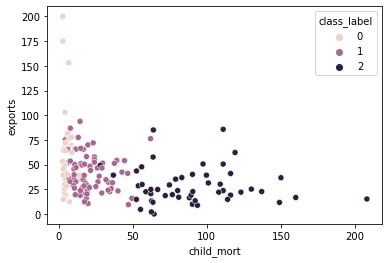

In [39]:
sns.scatterplot(x=dff['child_mort'],y=dff['exports'],hue=dff['class_label'])

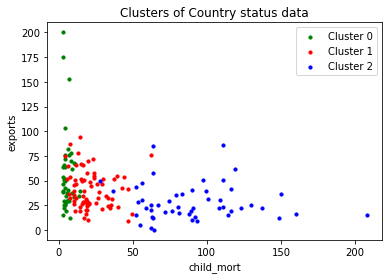

In [40]:
# Visualize the clusters
plt.scatter(dff.loc[dff['class_label'] == 0, 'child_mort'], dff.loc[dff['class_label'] == 0, 'exports'], s=10, c='g', label='Cluster 0')
plt.scatter(dff.loc[dff['class_label'] == 1, 'child_mort'], dff.loc[dff['class_label'] == 1, 'exports'], s=10, c='r', label='Cluster 1')
plt.scatter(dff.loc[dff['class_label'] == 2, 'child_mort'], dff.loc[dff['class_label'] == 2, 'exports'], s=10, c='b', label='Cluster 2')
plt.title('Clusters of Country status data')
plt.xlabel('child_mort')
plt.ylabel('exports')
plt.legend()
plt.show()